# Uber Fares

dataset ukradnuty z [Kaggle](https://www.kaggle.com/datasets/yasserh/uber-fares-dataset/data)

![obrazok](https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2F72721ab5-fb03-40f9-bfa6-332d5c02e2c7.jpg?source=next-article&fit=scale-down&quality=highest&width=700&dpr=1)

## Načítanie datasetu

In [1]:
import pandas as pd

df = pd.read_csv('data/uber.csv', index_col=0, parse_dates=['pickup_datetime'])

okrem načítania:
* premenujeme niekoľko stĺpcov
* pretypujeme stĺpce na menšie údajové typy
* odstránime duplicitný stĺpec
* odstránime riadky, ktoré nemajú hodnotu

In [2]:
df.rename(
    columns={
#        'key': 'start',
        'passenger_count': 'passengers',
        'pickup_datetime': 'pickup'
    },
    inplace=True
)
df['passengers'] = df['passengers'].astype('int16')
df['fare_amount'] = df['fare_amount'].astype('float32')

df['pickup_longitude'] = df['pickup_longitude'].astype('float32')
df['pickup_latitude'] = df['pickup_latitude'].astype('float32')
df['dropoff_longitude'] = df['dropoff_longitude'].astype('float32')
df['dropoff_latitude'] = df['dropoff_latitude'].astype('float32')

df.drop(columns=['key'], inplace=True)
df.dropna(inplace=True)

## Prehľad

In [3]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers
count,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000,199999.000000
mean,11.359891,-72.527626,39.935883,-72.525284,39.923885,1.684543
std,9.901760,11.437816,7.720559,13.117408,6.794829,1.385995
min,-52.000000,-1340.648438,-74.015518,-3356.666260,-881.985535,0.000000
25%,6.000000,-73.992065,40.734795,-73.991409,40.733824,1.000000
50%,8.500000,-73.981827,40.752590,-73.980095,40.753040,1.000000
75%,12.500000,-73.967155,40.767159,-73.963661,40.768002,2.000000
max,499.000000,57.418457,1644.421509,1153.572632,872.697632,208.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199999 entries, 24238194 to 11951496
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   fare_amount        199999 non-null  float32            
 1   pickup             199999 non-null  datetime64[ns, UTC]
 2   pickup_longitude   199999 non-null  float32            
 3   pickup_latitude    199999 non-null  float32            
 4   dropoff_longitude  199999 non-null  float32            
 5   dropoff_latitude   199999 non-null  float32            
 6   passengers         199999 non-null  int16              
dtypes: datetime64[ns, UTC](1), float32(5), int16(1)
memory usage: 7.2 MB


In [5]:
df

,fare_amount,pickup,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passengers
24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
27835199,7.7,2009-07-17 20:04:56+00:00,-73.994354,40.728226,-73.994713,40.750324,1
44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740768,-73.962563,40.772648,1
25894730,5.3,2009-06-26 08:22:21+00:00,-73.976128,40.790844,-73.965317,40.803349,3
17610152,16.0,2014-08-28 17:47:00+00:00,-73.925026,40.744083,-73.973083,40.761246,5
...,...,...,...,...,...,...,...
42598914,3.0,2012-10-28 10:49:00+00:00,-73.987045,40.739368,-73.986526,40.740295,1
16382965,7.5,2014-03-14 01:09:00+00:00,-73.984718,40.736835,-74.006676,40.739620,1
27804658,30.9,2009-06-29 00:42:00+00:00,-73.986015,40.756489,-73.858955,40.692589,2
20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1


## Otázky

1. Koľko peňazí sme zarobili za dané obdobie?

In [6]:
df['fare_amount'].sum()

2271966.8

2. Koľko peňazí sme zarobili za jednotlivé roky?

<Axes: title={'center': 'Zisk z jázd v jednotlivých rokoch'}, xlabel='year', ylabel='fare'>

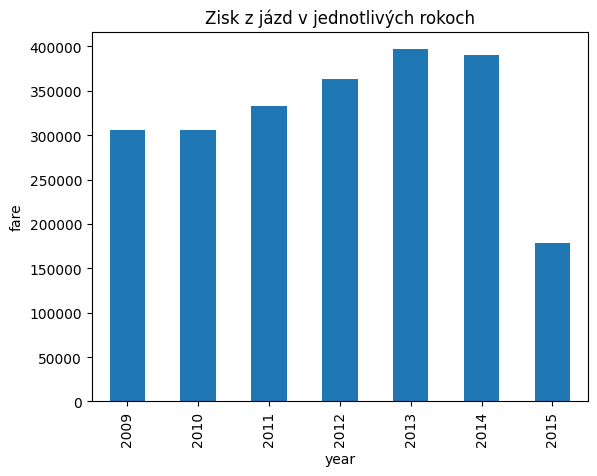

In [17]:
df.groupby(df['pickup'].dt.year)['fare_amount'].sum().plot(kind='bar', xlabel='year', ylabel='fare', title='Zisk z jázd v jednotlivých rokoch')

3. V ktorom mesiaci v roku 2013 bolo najviac jázd?

In [31]:
filter_2013 = df['pickup'].dt.year == 2013 
df2013 = df.loc[ filter_2013, : ]
df2013.groupby( df2013['pickup'].dt.month )['fare_amount'].sum().nlargest(1)

pickup
5    36311.460938
Name: fare_amount, dtype: float32

4. V ktorom mesiaci v roku 2014 bolo najviac jázd?

In [38]:
filter_2014 = df['pickup'].dt.year == 2014
df2014 = df.loc[ filter_2014, : ]
df2014.groupby( df2014['pickup'].dt.month )['pickup'].count().nlargest(1)

pickup
3    2755
Name: pickup, dtype: int64

5. V ktorý deň za uvedené obdobie bolo prevezných najviac pasažierov?

In [43]:
df.groupby(df['pickup'].dt.date)['passengers'].sum().nlargest(1)

pickup
2010-12-28    293
Name: passengers, dtype: int16